In [20]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm
import torch.optim.lr_scheduler as lr_scheduler

In [21]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [22]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [23]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

In [24]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [25]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

In [26]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [27]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator
lr_g = []
lr_d = []

In [28]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [29]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [30]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [31]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

### Training part

In [32]:
output_folder = 'outputs_1c-1'

118it [00:02, 44.95it/s]                         


Epoch 1 of 100
Generator loss: 1.55262999, Discriminator loss: 0.87511119
Epoch 1, Learning Rate for Discriminator: 0.0002
Epoch 1, Learning Rate for Generator: 0.0002


118it [00:02, 47.86it/s]                         


Epoch 2 of 100
Generator loss: 2.89798136, Discriminator loss: 1.08199961
Epoch 2, Learning Rate for Discriminator: 0.0002
Epoch 2, Learning Rate for Generator: 0.0002


118it [00:02, 49.04it/s]                         


Epoch 3 of 100
Generator loss: 4.72011580, Discriminator loss: 0.86485467
Epoch 3, Learning Rate for Discriminator: 0.0002
Epoch 3, Learning Rate for Generator: 0.0002


118it [00:02, 48.04it/s]                         


Epoch 4 of 100
Generator loss: 2.07291580, Discriminator loss: 0.99133060
Epoch 4, Learning Rate for Discriminator: 0.0002
Epoch 4, Learning Rate for Generator: 0.0002


118it [00:02, 49.43it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


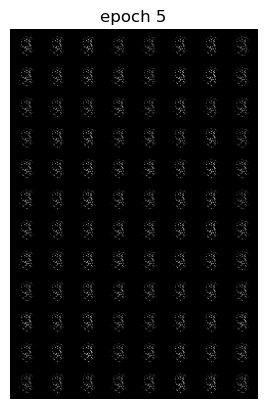

Epoch 5 of 100
Generator loss: 2.20399459, Discriminator loss: 1.00529430
Epoch 5, Learning Rate for Discriminator: 0.0002
Epoch 5, Learning Rate for Generator: 0.0002


118it [00:02, 48.57it/s]                         


Epoch 6 of 100
Generator loss: 1.52835982, Discriminator loss: 0.99095525
Epoch 6, Learning Rate for Discriminator: 0.0002
Epoch 6, Learning Rate for Generator: 0.0002


118it [00:02, 46.70it/s]                         


Epoch 7 of 100
Generator loss: 1.55760775, Discriminator loss: 1.02287984
Epoch 7, Learning Rate for Discriminator: 0.0002
Epoch 7, Learning Rate for Generator: 0.0002


118it [00:02, 48.18it/s]                         


Epoch 8 of 100
Generator loss: 1.44222485, Discriminator loss: 1.26602975
Epoch 8, Learning Rate for Discriminator: 0.0002
Epoch 8, Learning Rate for Generator: 0.0002


118it [00:02, 48.85it/s]                         


Epoch 9 of 100
Generator loss: 1.72789434, Discriminator loss: 0.93105140
Epoch 9, Learning Rate for Discriminator: 0.0002
Epoch 9, Learning Rate for Generator: 0.0002


118it [00:02, 47.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


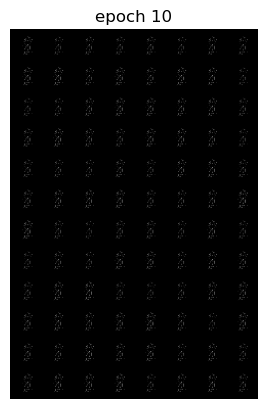

Epoch 10 of 100
Generator loss: 0.84560229, Discriminator loss: 1.33072500
Epoch 10, Learning Rate for Discriminator: 0.00018
Epoch 10, Learning Rate for Generator: 0.00018


118it [00:02, 49.19it/s]                         


Epoch 11 of 100
Generator loss: 1.40467279, Discriminator loss: 0.95601601
Epoch 11, Learning Rate for Discriminator: 0.00018
Epoch 11, Learning Rate for Generator: 0.00018


118it [00:02, 48.71it/s]                         


Epoch 12 of 100
Generator loss: 2.36832270, Discriminator loss: 0.73526903
Epoch 12, Learning Rate for Discriminator: 0.00018
Epoch 12, Learning Rate for Generator: 0.00018


118it [00:02, 48.78it/s]                         


Epoch 13 of 100
Generator loss: 2.37673663, Discriminator loss: 0.83301624
Epoch 13, Learning Rate for Discriminator: 0.00018
Epoch 13, Learning Rate for Generator: 0.00018


118it [00:02, 48.69it/s]                         


Epoch 14 of 100
Generator loss: 3.03614912, Discriminator loss: 0.53431369
Epoch 14, Learning Rate for Discriminator: 0.00018
Epoch 14, Learning Rate for Generator: 0.00018


118it [00:02, 47.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


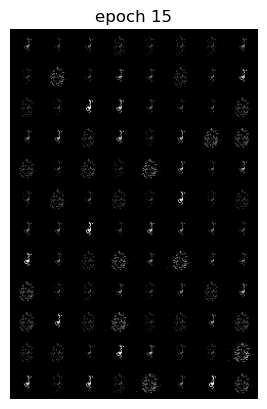

Epoch 15 of 100
Generator loss: 3.21029372, Discriminator loss: 0.67263765
Epoch 15, Learning Rate for Discriminator: 0.00018
Epoch 15, Learning Rate for Generator: 0.00018


118it [00:02, 49.06it/s]                         


Epoch 16 of 100
Generator loss: 2.81158917, Discriminator loss: 0.64890831
Epoch 16, Learning Rate for Discriminator: 0.00018
Epoch 16, Learning Rate for Generator: 0.00018


118it [00:02, 49.44it/s]                         


Epoch 17 of 100
Generator loss: 2.70077922, Discriminator loss: 0.65300652
Epoch 17, Learning Rate for Discriminator: 0.00018
Epoch 17, Learning Rate for Generator: 0.00018


118it [00:02, 46.94it/s]                         


Epoch 18 of 100
Generator loss: 3.18671691, Discriminator loss: 0.44401767
Epoch 18, Learning Rate for Discriminator: 0.00018
Epoch 18, Learning Rate for Generator: 0.00018


118it [00:02, 49.02it/s]                         


Epoch 19 of 100
Generator loss: 4.03266376, Discriminator loss: 0.44055412
Epoch 19, Learning Rate for Discriminator: 0.00018
Epoch 19, Learning Rate for Generator: 0.00018


118it [00:02, 47.91it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


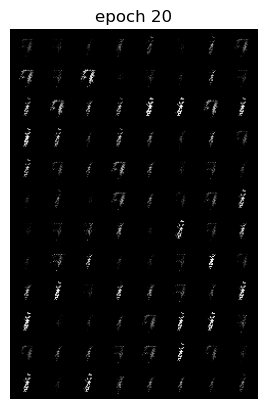

Epoch 20 of 100
Generator loss: 3.99658382, Discriminator loss: 0.50067684
Epoch 20, Learning Rate for Discriminator: 0.000162
Epoch 20, Learning Rate for Generator: 0.000162


118it [00:02, 47.73it/s]                         


Epoch 21 of 100
Generator loss: 3.05403502, Discriminator loss: 0.56533773
Epoch 21, Learning Rate for Discriminator: 0.000162
Epoch 21, Learning Rate for Generator: 0.000162


118it [00:02, 48.26it/s]                         


Epoch 22 of 100
Generator loss: 3.28236295, Discriminator loss: 0.38140493
Epoch 22, Learning Rate for Discriminator: 0.000162
Epoch 22, Learning Rate for Generator: 0.000162


118it [00:02, 49.40it/s]                         


Epoch 23 of 100
Generator loss: 3.11888541, Discriminator loss: 0.61130045
Epoch 23, Learning Rate for Discriminator: 0.000162
Epoch 23, Learning Rate for Generator: 0.000162


118it [00:02, 48.20it/s]                         


Epoch 24 of 100
Generator loss: 2.85300607, Discriminator loss: 0.56745300
Epoch 24, Learning Rate for Discriminator: 0.000162
Epoch 24, Learning Rate for Generator: 0.000162


118it [00:02, 49.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


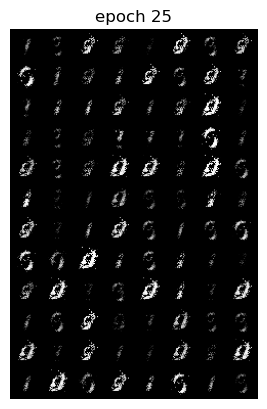

Epoch 25 of 100
Generator loss: 3.21851948, Discriminator loss: 0.42214623
Epoch 25, Learning Rate for Discriminator: 0.000162
Epoch 25, Learning Rate for Generator: 0.000162


118it [00:02, 47.85it/s]                         


Epoch 26 of 100
Generator loss: 3.14242439, Discriminator loss: 0.39687175
Epoch 26, Learning Rate for Discriminator: 0.000162
Epoch 26, Learning Rate for Generator: 0.000162


118it [00:02, 49.43it/s]                         


Epoch 27 of 100
Generator loss: 3.48817116, Discriminator loss: 0.40511498
Epoch 27, Learning Rate for Discriminator: 0.000162
Epoch 27, Learning Rate for Generator: 0.000162


118it [00:02, 49.47it/s]                         


Epoch 28 of 100
Generator loss: 3.55293009, Discriminator loss: 0.38357603
Epoch 28, Learning Rate for Discriminator: 0.000162
Epoch 28, Learning Rate for Generator: 0.000162


118it [00:02, 46.47it/s]                         


Epoch 29 of 100
Generator loss: 3.46618782, Discriminator loss: 0.37693486
Epoch 29, Learning Rate for Discriminator: 0.000162
Epoch 29, Learning Rate for Generator: 0.000162


118it [00:02, 49.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


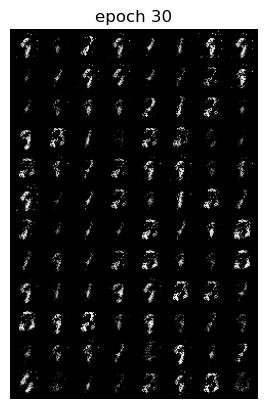

Epoch 30 of 100
Generator loss: 3.64263303, Discriminator loss: 0.37749491
Epoch 30, Learning Rate for Discriminator: 0.00014580000000000002
Epoch 30, Learning Rate for Generator: 0.00014580000000000002


118it [00:02, 48.73it/s]                         


Epoch 31 of 100
Generator loss: 3.91205730, Discriminator loss: 0.31362074
Epoch 31, Learning Rate for Discriminator: 0.00014580000000000002
Epoch 31, Learning Rate for Generator: 0.00014580000000000002


118it [00:02, 46.75it/s]                         


Epoch 32 of 100
Generator loss: 3.83633291, Discriminator loss: 0.33142600
Epoch 32, Learning Rate for Discriminator: 0.00014580000000000002
Epoch 32, Learning Rate for Generator: 0.00014580000000000002


118it [00:02, 48.98it/s]                         


Epoch 33 of 100
Generator loss: 3.79239434, Discriminator loss: 0.32581857
Epoch 33, Learning Rate for Discriminator: 0.00014580000000000002
Epoch 33, Learning Rate for Generator: 0.00014580000000000002


118it [00:02, 48.39it/s]                         


Epoch 34 of 100
Generator loss: 3.63511612, Discriminator loss: 0.40137351
Epoch 34, Learning Rate for Discriminator: 0.00014580000000000002
Epoch 34, Learning Rate for Generator: 0.00014580000000000002


118it [00:02, 48.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


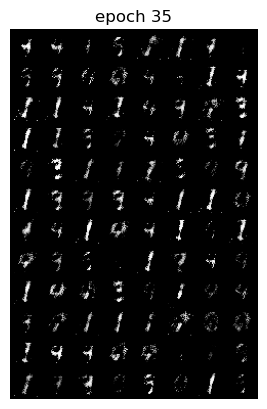

Epoch 35 of 100
Generator loss: 3.59681958, Discriminator loss: 0.31934220
Epoch 35, Learning Rate for Discriminator: 0.00014580000000000002
Epoch 35, Learning Rate for Generator: 0.00014580000000000002


118it [00:02, 48.76it/s]                         


Epoch 36 of 100
Generator loss: 3.40348526, Discriminator loss: 0.44871225
Epoch 36, Learning Rate for Discriminator: 0.00014580000000000002
Epoch 36, Learning Rate for Generator: 0.00014580000000000002


118it [00:02, 47.14it/s]                         


Epoch 37 of 100
Generator loss: 3.15906551, Discriminator loss: 0.50484263
Epoch 37, Learning Rate for Discriminator: 0.00014580000000000002
Epoch 37, Learning Rate for Generator: 0.00014580000000000002


118it [00:02, 47.93it/s]                         


Epoch 38 of 100
Generator loss: 3.33449822, Discriminator loss: 0.43985518
Epoch 38, Learning Rate for Discriminator: 0.00014580000000000002
Epoch 38, Learning Rate for Generator: 0.00014580000000000002


118it [00:02, 49.24it/s]                         


Epoch 39 of 100
Generator loss: 3.41233761, Discriminator loss: 0.40018167
Epoch 39, Learning Rate for Discriminator: 0.00014580000000000002
Epoch 39, Learning Rate for Generator: 0.00014580000000000002


118it [00:02, 47.85it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


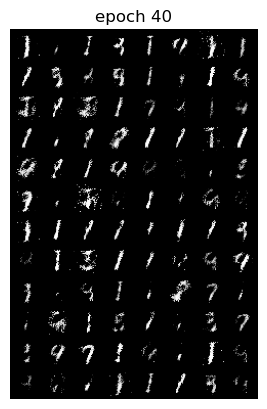

Epoch 40 of 100
Generator loss: 3.28514537, Discriminator loss: 0.36806220
Epoch 40, Learning Rate for Discriminator: 0.00013122000000000003
Epoch 40, Learning Rate for Generator: 0.00013122000000000003


118it [00:02, 48.78it/s]                         


Epoch 41 of 100
Generator loss: 3.17590661, Discriminator loss: 0.37889027
Epoch 41, Learning Rate for Discriminator: 0.00013122000000000003
Epoch 41, Learning Rate for Generator: 0.00013122000000000003


118it [00:02, 48.57it/s]                         


Epoch 42 of 100
Generator loss: 3.19692052, Discriminator loss: 0.39270124
Epoch 42, Learning Rate for Discriminator: 0.00013122000000000003
Epoch 42, Learning Rate for Generator: 0.00013122000000000003


118it [00:02, 48.00it/s]                         


Epoch 43 of 100
Generator loss: 3.32597158, Discriminator loss: 0.38940245
Epoch 43, Learning Rate for Discriminator: 0.00013122000000000003
Epoch 43, Learning Rate for Generator: 0.00013122000000000003


118it [00:02, 48.01it/s]                         


Epoch 44 of 100
Generator loss: 3.57967086, Discriminator loss: 0.36342908
Epoch 44, Learning Rate for Discriminator: 0.00013122000000000003
Epoch 44, Learning Rate for Generator: 0.00013122000000000003


118it [00:02, 47.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


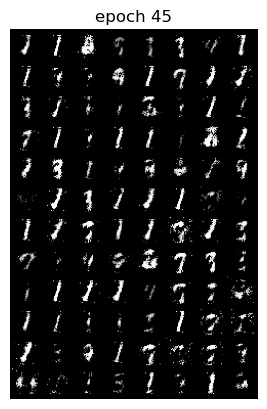

Epoch 45 of 100
Generator loss: 3.64077705, Discriminator loss: 0.35998189
Epoch 45, Learning Rate for Discriminator: 0.00013122000000000003
Epoch 45, Learning Rate for Generator: 0.00013122000000000003


118it [00:02, 47.47it/s]                         


Epoch 46 of 100
Generator loss: 3.30628957, Discriminator loss: 0.44530613
Epoch 46, Learning Rate for Discriminator: 0.00013122000000000003
Epoch 46, Learning Rate for Generator: 0.00013122000000000003


118it [00:02, 48.96it/s]                         


Epoch 47 of 100
Generator loss: 3.41939504, Discriminator loss: 0.37653302
Epoch 47, Learning Rate for Discriminator: 0.00013122000000000003
Epoch 47, Learning Rate for Generator: 0.00013122000000000003


118it [00:02, 48.40it/s]                         


Epoch 48 of 100
Generator loss: 3.48424895, Discriminator loss: 0.38094015
Epoch 48, Learning Rate for Discriminator: 0.00013122000000000003
Epoch 48, Learning Rate for Generator: 0.00013122000000000003


118it [00:02, 47.84it/s]                         


Epoch 49 of 100
Generator loss: 3.46491356, Discriminator loss: 0.43175701
Epoch 49, Learning Rate for Discriminator: 0.00013122000000000003
Epoch 49, Learning Rate for Generator: 0.00013122000000000003


118it [00:02, 48.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


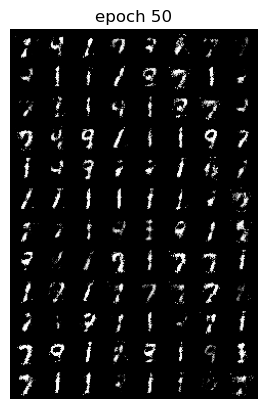

Epoch 50 of 100
Generator loss: 3.14373602, Discriminator loss: 0.43549405
Epoch 50, Learning Rate for Discriminator: 0.00011809800000000003
Epoch 50, Learning Rate for Generator: 0.00011809800000000003


118it [00:02, 47.92it/s]                         


Epoch 51 of 100
Generator loss: 3.18873893, Discriminator loss: 0.38428540
Epoch 51, Learning Rate for Discriminator: 0.00011809800000000003
Epoch 51, Learning Rate for Generator: 0.00011809800000000003


118it [00:02, 48.41it/s]                         


Epoch 52 of 100
Generator loss: 3.23200847, Discriminator loss: 0.39356247
Epoch 52, Learning Rate for Discriminator: 0.00011809800000000003
Epoch 52, Learning Rate for Generator: 0.00011809800000000003


118it [00:02, 48.11it/s]                         


Epoch 53 of 100
Generator loss: 3.00592646, Discriminator loss: 0.42084640
Epoch 53, Learning Rate for Discriminator: 0.00011809800000000003
Epoch 53, Learning Rate for Generator: 0.00011809800000000003


118it [00:02, 48.38it/s]                         


Epoch 54 of 100
Generator loss: 3.23108232, Discriminator loss: 0.41311972
Epoch 54, Learning Rate for Discriminator: 0.00011809800000000003
Epoch 54, Learning Rate for Generator: 0.00011809800000000003


118it [00:02, 48.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


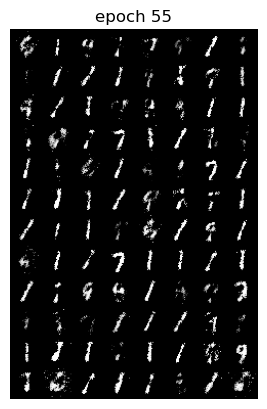

Epoch 55 of 100
Generator loss: 2.94642008, Discriminator loss: 0.45706888
Epoch 55, Learning Rate for Discriminator: 0.00011809800000000003
Epoch 55, Learning Rate for Generator: 0.00011809800000000003


118it [00:02, 47.28it/s]                         


Epoch 56 of 100
Generator loss: 2.99651899, Discriminator loss: 0.43931897
Epoch 56, Learning Rate for Discriminator: 0.00011809800000000003
Epoch 56, Learning Rate for Generator: 0.00011809800000000003


118it [00:02, 47.13it/s]                         


Epoch 57 of 100
Generator loss: 3.05519617, Discriminator loss: 0.45213711
Epoch 57, Learning Rate for Discriminator: 0.00011809800000000003
Epoch 57, Learning Rate for Generator: 0.00011809800000000003


118it [00:02, 47.27it/s]                         


Epoch 58 of 100
Generator loss: 2.99532146, Discriminator loss: 0.44400501
Epoch 58, Learning Rate for Discriminator: 0.00011809800000000003
Epoch 58, Learning Rate for Generator: 0.00011809800000000003


118it [00:02, 49.34it/s]                         


Epoch 59 of 100
Generator loss: 2.88213812, Discriminator loss: 0.46656944
Epoch 59, Learning Rate for Discriminator: 0.00011809800000000003
Epoch 59, Learning Rate for Generator: 0.00011809800000000003


118it [00:02, 48.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


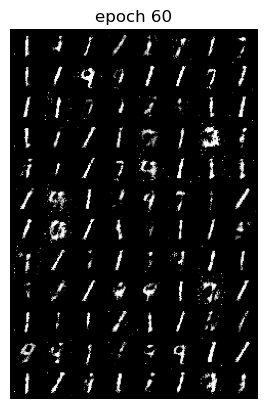

Epoch 60 of 100
Generator loss: 2.91809862, Discriminator loss: 0.44397560
Epoch 60, Learning Rate for Discriminator: 0.00010628820000000004
Epoch 60, Learning Rate for Generator: 0.00010628820000000004


118it [00:02, 45.94it/s]                         


Epoch 61 of 100
Generator loss: 2.83247250, Discriminator loss: 0.45942173
Epoch 61, Learning Rate for Discriminator: 0.00010628820000000004
Epoch 61, Learning Rate for Generator: 0.00010628820000000004


118it [00:02, 46.25it/s]                         


Epoch 62 of 100
Generator loss: 2.70527330, Discriminator loss: 0.46915570
Epoch 62, Learning Rate for Discriminator: 0.00010628820000000004
Epoch 62, Learning Rate for Generator: 0.00010628820000000004


118it [00:02, 48.63it/s]                         


Epoch 63 of 100
Generator loss: 2.72244171, Discriminator loss: 0.48383034
Epoch 63, Learning Rate for Discriminator: 0.00010628820000000004
Epoch 63, Learning Rate for Generator: 0.00010628820000000004


118it [00:02, 49.19it/s]                         


Epoch 64 of 100
Generator loss: 2.74046934, Discriminator loss: 0.47189681
Epoch 64, Learning Rate for Discriminator: 0.00010628820000000004
Epoch 64, Learning Rate for Generator: 0.00010628820000000004


118it [00:02, 47.85it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


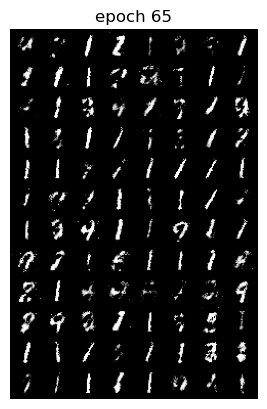

Epoch 65 of 100
Generator loss: 2.67009099, Discriminator loss: 0.49110141
Epoch 65, Learning Rate for Discriminator: 0.00010628820000000004
Epoch 65, Learning Rate for Generator: 0.00010628820000000004


118it [00:02, 49.38it/s]                         


Epoch 66 of 100
Generator loss: 2.63629026, Discriminator loss: 0.48760466
Epoch 66, Learning Rate for Discriminator: 0.00010628820000000004
Epoch 66, Learning Rate for Generator: 0.00010628820000000004


118it [00:02, 49.43it/s]                         


Epoch 67 of 100
Generator loss: 2.69137432, Discriminator loss: 0.48106444
Epoch 67, Learning Rate for Discriminator: 0.00010628820000000004
Epoch 67, Learning Rate for Generator: 0.00010628820000000004


118it [00:02, 46.14it/s]                         


Epoch 68 of 100
Generator loss: 2.65888855, Discriminator loss: 0.52735826
Epoch 68, Learning Rate for Discriminator: 0.00010628820000000004
Epoch 68, Learning Rate for Generator: 0.00010628820000000004


118it [00:02, 48.54it/s]                         


Epoch 69 of 100
Generator loss: 2.79626475, Discriminator loss: 0.48853551
Epoch 69, Learning Rate for Discriminator: 0.00010628820000000004
Epoch 69, Learning Rate for Generator: 0.00010628820000000004


118it [00:02, 49.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


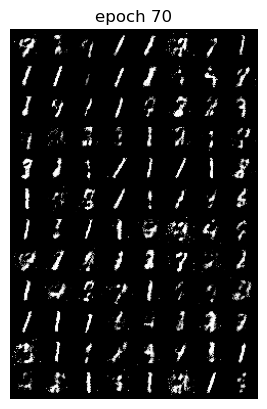

Epoch 70 of 100
Generator loss: 2.63719532, Discriminator loss: 0.53111801
Epoch 70, Learning Rate for Discriminator: 9.565938000000004e-05
Epoch 70, Learning Rate for Generator: 9.565938000000004e-05


118it [00:02, 47.52it/s]                         


Epoch 71 of 100
Generator loss: 2.53473337, Discriminator loss: 0.52302698
Epoch 71, Learning Rate for Discriminator: 9.565938000000004e-05
Epoch 71, Learning Rate for Generator: 9.565938000000004e-05


118it [00:02, 49.28it/s]                         


Epoch 72 of 100
Generator loss: 2.54764393, Discriminator loss: 0.50054526
Epoch 72, Learning Rate for Discriminator: 9.565938000000004e-05
Epoch 72, Learning Rate for Generator: 9.565938000000004e-05


118it [00:02, 49.44it/s]                         


Epoch 73 of 100
Generator loss: 2.54916956, Discriminator loss: 0.55192178
Epoch 73, Learning Rate for Discriminator: 9.565938000000004e-05
Epoch 73, Learning Rate for Generator: 9.565938000000004e-05


118it [00:02, 47.11it/s]                         


Epoch 74 of 100
Generator loss: 2.53899263, Discriminator loss: 0.53237261
Epoch 74, Learning Rate for Discriminator: 9.565938000000004e-05
Epoch 74, Learning Rate for Generator: 9.565938000000004e-05


118it [00:02, 49.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


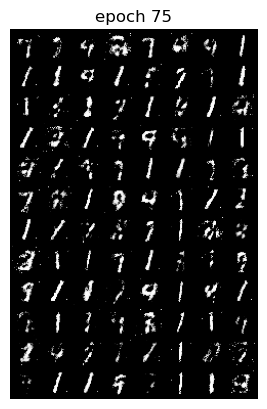

Epoch 75 of 100
Generator loss: 2.53101506, Discriminator loss: 0.53862918
Epoch 75, Learning Rate for Discriminator: 9.565938000000004e-05
Epoch 75, Learning Rate for Generator: 9.565938000000004e-05


118it [00:02, 48.08it/s]                         


Epoch 76 of 100
Generator loss: 2.54332623, Discriminator loss: 0.54579533
Epoch 76, Learning Rate for Discriminator: 9.565938000000004e-05
Epoch 76, Learning Rate for Generator: 9.565938000000004e-05


118it [00:02, 46.37it/s]                         


Epoch 77 of 100
Generator loss: 2.46633690, Discriminator loss: 0.54983324
Epoch 77, Learning Rate for Discriminator: 9.565938000000004e-05
Epoch 77, Learning Rate for Generator: 9.565938000000004e-05


118it [00:02, 48.95it/s]                         


Epoch 78 of 100
Generator loss: 2.65222095, Discriminator loss: 0.53836435
Epoch 78, Learning Rate for Discriminator: 9.565938000000004e-05
Epoch 78, Learning Rate for Generator: 9.565938000000004e-05


118it [00:02, 48.45it/s]                         


Epoch 79 of 100
Generator loss: 2.52613662, Discriminator loss: 0.56971022
Epoch 79, Learning Rate for Discriminator: 9.565938000000004e-05
Epoch 79, Learning Rate for Generator: 9.565938000000004e-05


118it [00:02, 46.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


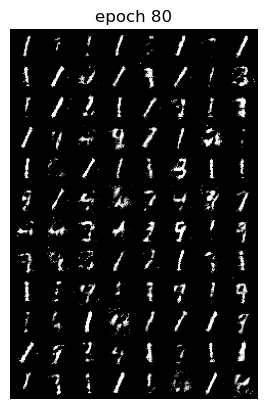

Epoch 80 of 100
Generator loss: 2.69156917, Discriminator loss: 0.55378605
Epoch 80, Learning Rate for Discriminator: 8.609344200000004e-05
Epoch 80, Learning Rate for Generator: 8.609344200000004e-05


118it [00:02, 48.79it/s]                         


Epoch 81 of 100
Generator loss: 2.54372555, Discriminator loss: 0.54986405
Epoch 81, Learning Rate for Discriminator: 8.609344200000004e-05
Epoch 81, Learning Rate for Generator: 8.609344200000004e-05


118it [00:02, 48.82it/s]                         


Epoch 82 of 100
Generator loss: 2.39132309, Discriminator loss: 0.58858851
Epoch 82, Learning Rate for Discriminator: 8.609344200000004e-05
Epoch 82, Learning Rate for Generator: 8.609344200000004e-05


118it [00:02, 48.65it/s]                         


Epoch 83 of 100
Generator loss: 2.40876945, Discriminator loss: 0.57900956
Epoch 83, Learning Rate for Discriminator: 8.609344200000004e-05
Epoch 83, Learning Rate for Generator: 8.609344200000004e-05


118it [00:02, 49.28it/s]                         


Epoch 84 of 100
Generator loss: 2.48307877, Discriminator loss: 0.54803264
Epoch 84, Learning Rate for Discriminator: 8.609344200000004e-05
Epoch 84, Learning Rate for Generator: 8.609344200000004e-05


118it [00:02, 48.43it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


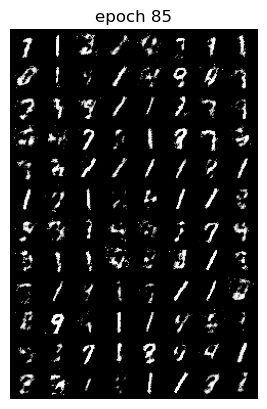

Epoch 85 of 100
Generator loss: 2.52335212, Discriminator loss: 0.55896426
Epoch 85, Learning Rate for Discriminator: 8.609344200000004e-05
Epoch 85, Learning Rate for Generator: 8.609344200000004e-05


118it [00:02, 47.02it/s]                         


Epoch 86 of 100
Generator loss: 2.47209440, Discriminator loss: 0.58399594
Epoch 86, Learning Rate for Discriminator: 8.609344200000004e-05
Epoch 86, Learning Rate for Generator: 8.609344200000004e-05


118it [00:02, 49.29it/s]                         


Epoch 87 of 100
Generator loss: 2.36309529, Discriminator loss: 0.59832764
Epoch 87, Learning Rate for Discriminator: 8.609344200000004e-05
Epoch 87, Learning Rate for Generator: 8.609344200000004e-05


118it [00:02, 47.55it/s]                         


Epoch 88 of 100
Generator loss: 2.29432665, Discriminator loss: 0.59685202
Epoch 88, Learning Rate for Discriminator: 8.609344200000004e-05
Epoch 88, Learning Rate for Generator: 8.609344200000004e-05


118it [00:02, 47.56it/s]                         


Epoch 89 of 100
Generator loss: 2.31750393, Discriminator loss: 0.59725328
Epoch 89, Learning Rate for Discriminator: 8.609344200000004e-05
Epoch 89, Learning Rate for Generator: 8.609344200000004e-05


118it [00:02, 48.92it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


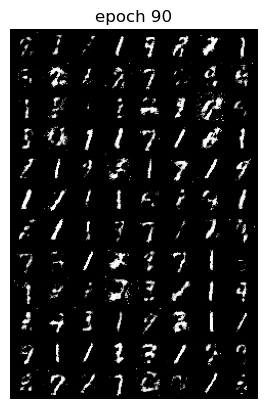

Epoch 90 of 100
Generator loss: 2.26186713, Discriminator loss: 0.62278692
Epoch 90, Learning Rate for Discriminator: 7.748409780000004e-05
Epoch 90, Learning Rate for Generator: 7.748409780000004e-05


118it [00:02, 46.87it/s]                         


Epoch 91 of 100
Generator loss: 2.18341324, Discriminator loss: 0.61138297
Epoch 91, Learning Rate for Discriminator: 7.748409780000004e-05
Epoch 91, Learning Rate for Generator: 7.748409780000004e-05


118it [00:02, 45.50it/s]                         


Epoch 92 of 100
Generator loss: 2.19072249, Discriminator loss: 0.61553591
Epoch 92, Learning Rate for Discriminator: 7.748409780000004e-05
Epoch 92, Learning Rate for Generator: 7.748409780000004e-05


118it [00:02, 47.88it/s]                         


Epoch 93 of 100
Generator loss: 2.22584318, Discriminator loss: 0.60467252
Epoch 93, Learning Rate for Discriminator: 7.748409780000004e-05
Epoch 93, Learning Rate for Generator: 7.748409780000004e-05


118it [00:02, 48.48it/s]                         


Epoch 94 of 100
Generator loss: 2.24103215, Discriminator loss: 0.59307186
Epoch 94, Learning Rate for Discriminator: 7.748409780000004e-05
Epoch 94, Learning Rate for Generator: 7.748409780000004e-05


118it [00:02, 47.98it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


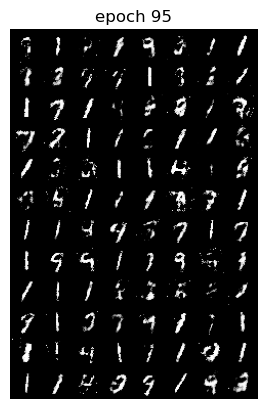

Epoch 95 of 100
Generator loss: 2.34503652, Discriminator loss: 0.58700549
Epoch 95, Learning Rate for Discriminator: 7.748409780000004e-05
Epoch 95, Learning Rate for Generator: 7.748409780000004e-05


118it [00:02, 49.02it/s]                         


Epoch 96 of 100
Generator loss: 2.45443560, Discriminator loss: 0.59129842
Epoch 96, Learning Rate for Discriminator: 7.748409780000004e-05
Epoch 96, Learning Rate for Generator: 7.748409780000004e-05


118it [00:02, 49.02it/s]                         


Epoch 97 of 100
Generator loss: 2.39533777, Discriminator loss: 0.61892414
Epoch 97, Learning Rate for Discriminator: 7.748409780000004e-05
Epoch 97, Learning Rate for Generator: 7.748409780000004e-05


118it [00:02, 47.16it/s]                         


Epoch 98 of 100
Generator loss: 2.29935463, Discriminator loss: 0.59740450
Epoch 98, Learning Rate for Discriminator: 7.748409780000004e-05
Epoch 98, Learning Rate for Generator: 7.748409780000004e-05


118it [00:02, 48.83it/s]                         


Epoch 99 of 100
Generator loss: 2.34753961, Discriminator loss: 0.59663761
Epoch 99, Learning Rate for Discriminator: 7.748409780000004e-05
Epoch 99, Learning Rate for Generator: 7.748409780000004e-05


118it [00:02, 49.16it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


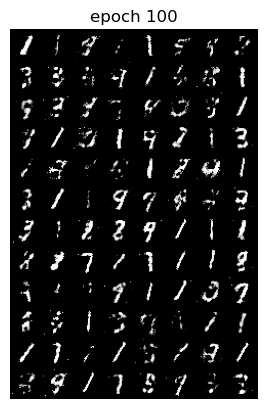

Epoch 100 of 100
Generator loss: 2.32357269, Discriminator loss: 0.58566116
Epoch 100, Learning Rate for Discriminator: 6.973568802000003e-05
Epoch 100, Learning Rate for Generator: 6.973568802000003e-05


In [33]:
torch.manual_seed(7777)
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

scheduler_g = lr_scheduler.StepLR(optim_g, step_size=25, gamma=0.8)
scheduler_d = lr_scheduler.StepLR(optim_d, step_size=25, gamma=0.8)

epochs = 200
# Smoothing factor
smooth_factor = 0.1
def generator_loss(output, true_label):

    smoothed_real_label = torch.ones_like(true_label) - smooth_factor
    loss = criterion(output, smoothed_real_label)
    
    return loss
def discriminator_loss(output, true_label):

    # Label smoothing for real and fake images
    smoothed_real_label = torch.ones_like(true_label[0]) - smooth_factor
    smoothed_fake_label = torch.zeros_like(true_label[1]) + smooth_factor

    loss_real_image = criterion(output[0], smoothed_real_label)
    loss_fake_image = criterion(output[1], smoothed_fake_label)


    
    return loss_real_image + loss_fake_image

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        # Training discriminator
        real_images = data[0].to(device)
        batch_size = real_images.size(0)
        
        
        # Sample batch_size noise samples of dimension nz
        noise = create_noise(batch_size, nz)
        
        discriminate_real_images = discriminator(real_images)
        fake_images = generator(noise).to(device)
        discriminate_fake_images = discriminator(fake_images)

        # label the images
        real_label = label_real(batch_size)
        fake_label = label_fake(batch_size)

        # Set output and labels to pass to the loss function
        output = (discriminate_real_images, discriminate_fake_images)
        true_label = (real_label, fake_label)
        loss_d_ = discriminator_loss(output, true_label)
        

        ## Zero the grad
        optim_d.zero_grad()
        ## Backpropagate the loss
        loss_d_.backward()
        ## Update the weights
        optim_d.step()

        # Train the generator for k = 1 step
        # Sample new noise
        noise = create_noise(batch_size, nz)
        # Generate fake images
        fake_images = generator(noise).to(device)
        # Discriminate fake images
        discriminate_fake_images = discriminator(fake_images)
        # Get the generative loss
        loss_g_ = generator_loss(discriminate_fake_images, real_label)



        ## Zero the grad
        optim_g.zero_grad()
        ## Backpropagate the loss
        loss_g_.backward()
        ## Update the weights
        optim_g.step()

        loss_g += loss_g_.item()
        loss_d += loss_d_.item()

    
    
        ######################################
    scheduler_g.step()
    scheduler_d.step()
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"{output_folder}/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    new_lr_d = optim_d.param_groups[0]["lr"]
    new_lr_g = optim_g.param_groups[0]["lr"]
    lr_g.append(new_lr_g)
    lr_d.append(new_lr_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")
    print(f'Epoch {epoch + 1}, Learning Rate for Discriminator: {new_lr_d}')
    print(f'Epoch {epoch + 1}, Learning Rate for Generator: {new_lr_g}')

In [34]:
print('DONE TRAINING')
torch.save(generator.state_dict(), f'{output_folder}/generator.pth')

DONE TRAINING


In [35]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave(f'{output_folder}/generator_images.gif', imgs)

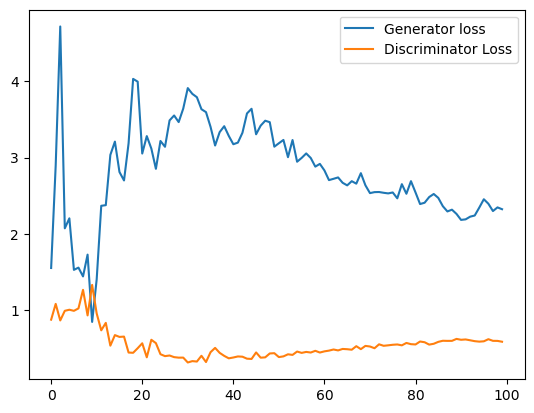

In [36]:
import numpy as np

# move each item in losses_g to cpu and convert to numpy array
# losses_g = [item.cpu().detach().numpy().item() for item in losses_g]
# losses_d = [item.cpu().detach().numpy().item() for item in losses_d]

# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig(f'{output_folder}/loss.png')

In [6]:
print(losses_g)
print(losses_d)

NameError: name 'losses_g' is not defined